# 颜色空间的转换-RGB和YIQ

## YIQ色彩空间
YIQ色彩空间通常被北美的电视系统所采用，属于NTSC（National Television Standards Committee）系统。这里Y不是指黄色，而是指颜色的明视度（Luminance），即亮度（Brightness）。其实Y就是图像的灰度值（Gray value），而I和Q则是指色调（Chrominance），即描述图像色彩及饱和度的属性。在YIQ系统中，Y分量代表图像的亮度信息，I、Q两个分量则携带颜色信息，I分量代表从橙色到青色的颜色变化，而Q分量则代表从紫色到黄绿色的颜色变化。
NTSC制为了进一步压缩色度带宽，用色差信号I,Q来代替U,V。若采用U,V色差信号，则色度、亮度信号的共频带部分极大，低端不共频带的亮度信号带宽很小，亮、色干扰大。将彩色图像从RGB转换到YIQ色彩空间，可以把彩色图像中的亮度信息与色度信息分开，分别独立进行处理。
RGB和YIQ的对应关系用下面的方程式表示：

Y=0.299R+0.587G+0.114B

I=0.596R-0.274G-0.322B

Q=0.211R-0.523G+0.312B


## 优点：

较其他颜色空间，YIQ颜色空间具有能将图像中的亮度分量分离提取出来的优点，并且YIQ颜色空间与RGB颜色空间之间是线性变换的关系，计算量小，聚类特性也比较好，可以适应光照强度不断变化的场合，因此能够有效地用于彩色图像处理。可用于在自然条件下采集到的复杂背景下的运动目标的识别。

## 代码实现

In [5]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pyexcel_xls import get_data
import pandas as pd
from pandas import DataFrame
import math
import scipy
from scipy import linalg

In [6]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [7]:
yiq_from_rgb = np.array([[0.299     ,  0.587     ,  0.114     ],
                         [0.59590059, -0.27455667, -0.32134392],
                         [0.21153661, -0.52273617,  0.31119955]])
rgb_from_yiq = linalg.inv(yiq_from_rgb)

def rgb2yiq(img_rgb):
    src = np.float64(img_rgb)
    arr = np.reshape(src,(src.shape[0] * src.shape[1],src.shape[2]))
    yiq = np.dot(arr,yiq_from_rgb.T.copy())
    yiq = np.reshape(yiq,src.shape)
    return yiq

def yiq2rgb(img_yiq):
    src = np.float64(img_yiq)
    arr = np.reshape(src,(src.shape[0] * src.shape[1],src.shape[2]))
    rgb = np.dot(arr,rgb_from_yiq.T.copy())
    rgb = np.reshape(rgb,src.shape)
    return cv2.convertScaleAbs(rgb)

Text(0.5,1,'YIQ->RGB')

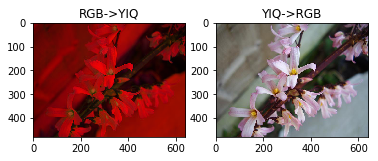

In [8]:
yiq = rgb2yiq(src)
rgb = yiq2rgb(yiq)

plt.subplot(121)
plt.imshow(cv2.convertScaleAbs(yiq))
plt.title('RGB->YIQ')

plt.subplot(122)
plt.imshow(rgb)
plt.title('YIQ->RGB')

参考：

[1].https://baike.baidu.com/item/YIQ/1977357